<a href="https://colab.research.google.com/github/gabrielmprata/MVP_SP02_Macine_Learning_Deep/blob/main/MVP_SP02_Macine_Learning_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

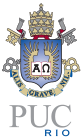 <font size="4"> **MVP de Machine Learning e Deep Learning**

---
>
**Pós-Graduação em Ciência de Dados e Analytics**
>
**Sprint 02**
>
**Aluno**: Gabriel Prata
>
**Data**: 05/06/2023
>
---

#**<font color=#FE8202> 1. Definição do problema**

A malha rodoviária é a principal forma de locomoção do país no que tange o deslocamento de pessoas, produtos, matérias primas, alimentos e combustível a curtas e longas distâncias.
>
Este trabalho visa mostrar através dos dados abertos disponibilizados pela Polícia Rodoviária Federal, dentre os 70.000 Km de rodovias onde atua, o impacto dos acidentes de trânsito e sua letalidade nas rodovias federais, tendo como período analisado o ano de 2020.
>
O Brasil é o terceiro país com mais mortes no trânsito, ficando atrás apenas da Índia e da China segundo o relatório Global Status Report on Road Safety da Organização Mundial de Saúde (OMS).
>
Cerca de 82% dos acidentes de trânsito nas rodovias federais brasileiras, são com vítimas, tendo em vista esse grande percentual de vítimas, nesse estudo, queremos entender os fatores que contribuem para os acidentes acontecerem.
>
Esse estudo tem como objetivo geral analisar o estado físico dos envolvidos, classificando o acidente de trânsito em "com vítimas" ou "sem vítimas", fazendo uso de **algoritmos de aprendizado de máquina supervisionado**.
>
O dataset conta com 30 atributos relacionados à caracterização do acidente, 4 atributos que classifica o estado das vítimas em, ilesos, feridos leve, feridos grave e mortos, e 1 variável que classifica o acidente em, sem vítimas, com vítimas feridas e com vitimas fatais. Essa ultima variável utilizaremos como alvo e as demais, serão analisadas para definir quais serão selecionadas como preditoras.
>
Para mais informações sobre o dataset, consulte: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dicionario-de-dados


>**<font color=#FE8202> Dicionário de dados**

1.   **id**    -  Variável com valores numéricos, representando o identificador do acidente
2.   **pesid** - Variável com valores numéricos, representando o identificador da pessoa envolvida
3. **data_inversa** - Data da ocorrência no formato dd/mm/aaaa.
4. **dia_semana** - Dia da semana da ocorrência. Ex.: Segunda, terça, etc.
5. **horario** - Horário da ocorrência no formato hh:mm:ss.
6. **uf** - Unidade da Federação. Ex.: MG, SP, etc.
7. **br** - Variável com valores numéricos, representando o identificador da BR.
8. **km** - Identificação do quilômetro onde ocorreu o acidente, com valor mínimo de 0,1 km e com a casa decimal separada por ponto.
9. **municipio** - Nome do município de ocorrência do acidente.
10. **causa_acidente** - Identificação da causa principal do acidente.
11. **tipo_acidente** - Identificação do tipo de acidente. Ex.: Colisão frontal, etc.
12. **classificação_acidente** - Classificação quanto à gravidade do acidente.
13. **fase_dia** - Fase do dia no momento do acidente. Ex.: Amanhecer, Pleno dia, etc.
14. **sentido_via** - Sentido da via considerando o ponto de colisão: Crescente e decrescente.
15. **Condição_meteorologica** - Condição meteorologica no momento do acidente. Ex.: Céu claro, chuva, etc.
16. **tipo_pista** - Tipo da pista considerando a quantidade de faixas: Dupla. simples ou múltipla.
17. **tracado_pista** - Descrição do traçãdo da via.
18. **usu_solo** - Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não.
19. **id_veiculo** - Variável com valores numéricos, representando o identificador do veículo envolvido.
20. **tipo_veiculo** - Tipo do veículo conforme Art. 96 do CNT. Ex.: Automóvel, Caminhão, etc.
21. **marca** - Descrição da marca do veículo.
22. **ano_fabricacao_veiculo** - Ana de fabricação do veículo, formato aaaa.
23. **tipo_envolvido** - Tipo de envolvido no acidente conforme sua participação no evento. Ex.: condutor, passageiro, etc.
24. **estado_fisico** - Condição do envolvido conforme a gravidade das lesões.Ex.:morto,feridoleve,etc.
25. **idade** - Idade do envolvido. O código "-1" indica que não foi possivel coletar a informação.
26. **sexo** - Sexo do envolvido. O valor "invalido" indica que não foi possivel coletar a informação.
27. **ilesos** - Valor binário que identifica se o envolvido foi classificado como ileso.
28. **feridos_leves** - Valor binário que identifica se o envolvido foi classificado como ferido leve.
29. **feridos_graves** - Valor binário que identifica se o envolvido foi classificado como ferido grave.
30. **mortos** - Valor binário que identifica se o envolvido foi classificado como morto.
31. **latitude** - Latitude do local do acidente em formato geodésico decimal.
32. **longitude** - Longitude do local do acidente em formato geodésico decimal.
33. **regional** - Não definido no dicionário de dados fornecido pela PRF.
34. **delegacia** - Não definido no dicionário de dados fornecido pela PRF.
35. **uop** - Não definido no dicionário de dados fornecido pela PRF.



#**<font color=#FE8202> 2. Carga de Dados**

Nesse tópico iremos importar o dataset que está armazenado no GitHub, separado por ano, no formato CSV, com cabeçalho e separado por ponto e vírgula(;).
>
Iremos utilizar o pacote Pandas, para carregar esse arquivo, através de uma URL, e armazenaremos os dados em um **dataframe**(matrizes multidimensionais similares a uma tabela de dados relacionais, com linhas e colunas rotuladas).
>
Para isso, utilizaremos o método read_csv()

In [1]:
# Importando todas as bibliotecas que iremos utilizar no projeto
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

#bibliotecas para visualização de dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec #geometria da grade e alocar subplot
import folium #mapas
import branca.colormap as cm
import plotly.graph_objects as go

# Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

# Separar treino e teste
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Validação cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#from datetime import datetime, date, time
import time
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import json
import requests

###**<font color=#FE8202> 2.1. Dataset Acidentes**

In [2]:
# importando dados de uma url para um dataframe

# URL de importação
url  = "https://raw.githubusercontent.com/gabrielmprata/MVP_Sprint01_Puc_Rio/master/acidentes2019.csv"
url2 = "https://raw.githubusercontent.com/gabrielmprata/MVP_Sprint01_Puc_Rio/master/acidentes2020.csv"

# Carga do dataset para o Pandas dataframe
acidentes_2019 = pd.read_csv(url, encoding="Latin 1", sep=';')
acidentes_2020 = pd.read_csv(url2, encoding="Latin 1", sep=';')


In [3]:
# Concatenar os dataframes de 2019 e 2020 em um único dataframe.
# Utilizaremos o método "concat"

acidentes = pd.concat([acidentes_2019, acidentes_2020], sort=False, ignore_index=True)

# Apagando os dataframes que não iremos mais utilizar
del acidentes_2020
del acidentes_2019

#**<font color=#FE8202> 3. Análise de Dados Inicial**

Nessa etapa iremos fazer a análise exploratória **inicial** de dados.
>
Uma etapa bem crítica, pois nesse primeiro momento, devemos compreender bem os dados.
>
Depois de entender melhor esses dados, na próxima etapa, seremos capazes de limpar, transformar e apresentar melhor os dados, assim como obter os melhores resultados possíveis nos algoritmos de Machine Learning.

###**<font color=#FE8202> 3.1. Estatísticas Descritivas**

Compreende a organização, o resumo e, descrever os dados, que podem ser expressos em tabelas e gráficos.
>
Veremos a seguir alguns comandos para exibir algumas estatísticas descritivas.
>
---



In [4]:
#	Quantidade de atributos e instâncias (linhas/colunas)
acidentes.shape

(310239, 35)

Um dataframe com 310.239 mil linhas e 35 colunas


---



In [5]:
# verificando os tipos de dados de cada coluna do dataframe
acidentes.dtypes

id                        float64
pesid                     float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
id_veiculo                  int64
tipo_veiculo               object
marca                      object
ano_fabricacao_veiculo    float64
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves               int64
feridos_graves              int64
mortos        



---



In [6]:
# Mostra diversas informações do Dataframe em um único comando
acidentes.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310239 entries, 0 to 310238
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      310239 non-null  float64
 1   pesid                   310237 non-null  float64
 2   data_inversa            310239 non-null  object 
 3   dia_semana              310239 non-null  object 
 4   horario                 310239 non-null  object 
 5   uf                      310239 non-null  object 
 6   br                      309599 non-null  float64
 7   km                      309599 non-null  object 
 8   municipio               310239 non-null  object 
 9   causa_acidente          310239 non-null  object 
 10  tipo_acidente           310212 non-null  object 
 11  classificacao_acidente  310239 non-null  object 
 12  fase_dia                310239 non-null  object 
 13  sentido_via             310239 non-null  object 
 14  condicao_metereologi


A função info() da biblioteca pandas, nos fornece um resumo do dataframe, sendo muito útil para ter uma visão geral do conjunto de dados.
>
Usando o parâmetro memory_usage = “deep”, saberemos exatamente quanto de memória o dataframe está utilizando.
>
Sendo assim, depois dos processos de transformações de dados saberemos se tivemos algum ganho de memoria no dataframe.


O dataframe está ocupando cerca de 564 Megas de espaço.


---



In [7]:
# Exibe as 5 primeiras linhas (Default do comando head)
acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182256.0,403856.0,2019-01-01,terça-feira,04:00:00,CE,116.0,"136,9",RUSSAS,Animais na Pista,...,Masculino,1,0,0,0,"-4,766018","-38,056034",SPRF-CE,DEL03-CE,UOP01-DEL03-CE
1,182263.0,402859.0,2019-01-01,terça-feira,05:00:00,MT,158.0,"599,5",AGUA BOA,Defeito Mecânico no Veículo,...,Masculino,1,0,0,0,"-14,319","-52,169",SPRF-MT,DEL07-MT,UOP02-DEL07-MT
2,182277.0,402850.0,2019-01-01,terça-feira,10:00:00,PA,10.0,34,DOM ELISEU,Velocidade Incompatível,...,Masculino,1,0,0,0,"-4,15296734","-47,54608154",SPRF-PA,DEL02-PA,UOP02-DEL02-PA
3,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,101.0,13,RIO REAL,Ingestão de Álcool,...,Masculino,1,0,0,0,"-11,5896","-37,8761",SPRF-SE,DEL02-SE,UOP03-DEL02-SE
4,182307.0,402638.0,2019-01-01,terça-feira,13:50:00,BA,116.0,440,FEIRA DE SANTANA,Ingestão de Álcool,...,Masculino,0,1,0,0,"-12,344","-39,087",SPRF-BA,DEL02-BA,UOP01-DEL02-BA


In [8]:
# Exibe as 5 últimas linhas (Default do comando tail)
acidentes.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
310234,463900.0,1004448.0,2020-02-18,terça-feira,11:45:00,BA,101.0,315,PRESIDENTE TANCREDO NEVES,Ultrapassagem Indevida,...,Feminino,0,1,0,0,-13.29906,-39.34004,SPRF-BA,DEL05-BA,UOP03-DEL05-BA
310235,463900.0,1004447.0,2020-02-18,terça-feira,11:45:00,BA,101.0,315,PRESIDENTE TANCREDO NEVES,Ultrapassagem Indevida,...,Masculino,0,1,0,0,-13.29906,-39.34004,SPRF-BA,DEL05-BA,UOP03-DEL05-BA
310236,463900.0,1004446.0,2020-02-18,terça-feira,11:45:00,BA,101.0,315,PRESIDENTE TANCREDO NEVES,Ultrapassagem Indevida,...,Masculino,1,0,0,0,-13.29906,-39.34004,SPRF-BA,DEL05-BA,UOP03-DEL05-BA
310237,465902.0,1008121.0,2020-04-18,sábado,10:15:00,BA,242.0,"409,6",LAJEDINHO,Ultrapassagem Indevida,...,Feminino,0,0,1,0,-12.444242,-40.798419,SPRF-BA,DEL06-BA,UOP01-DEL06-BA
310238,465902.0,1008119.0,2020-04-18,sábado,10:15:00,BA,242.0,"409,6",LAJEDINHO,Ultrapassagem Indevida,...,Masculino,0,0,0,1,-12.444242,-40.798419,SPRF-BA,DEL06-BA,UOP01-DEL06-BA


Com a exibição das linhas, é mais fácil perceber que o processo de importação, considerou alguns atributos como Float ao inves de integer.
>
Nesse momento não irá interferir na exploração inicial de dados, depois na etpada de pré-processamento iremos modificar.


---



In [9]:
# Quantidade de valores únicos
acidentes.nunique()

id                        131132
pesid                     310237
data_inversa                 731
dia_semana                     7
horario                     1396
uf                            27
br                           118
km                          8840
municipio                   1869
causa_acidente                63
tipo_acidente                 20
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                216089
tipo_veiculo                  25
marca                      10966
ano_fabricacao_veiculo        65
tipo_envolvido                 6
estado_fisico                  5
idade                        144
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_graves                 2
mortos                         2
latitude  

Com o comando nunique() já podemos ter uma rápida noção da coerência dos atributos, como por exemplo:
>
Temos 144 valores diferentes no atributo idade, o que pode indicar alguma discrepância nos valores informados, ou seja, precisamos explorar mais esse atributo.
>


---




In [10]:
# Quantidade de nulls no dataframe
acidentes.isnull().sum()

id                            0
pesid                         2
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          640
km                          640
municipio                     0
causa_acidente                0
tipo_acidente                27
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                    0
tipo_veiculo                  0
marca                     16584
ano_fabricacao_veiculo    20369
tipo_envolvido                0
estado_fisico                 0
idade                     30708
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude                      0
longitud

Dos 35 atributos, 10 apresentam registros nulos, que deverão ser tratados na etapa de pre-processamento de dados.


---



Vamos verificar agora, se existe alguma duplicidade de registro.
>
Segundo a documentação do dataset existe o campo ID com o número único do registro do acidente, e o pesid com o número único que identifica a pessoa envolvida no registro do acidente.
>
Sendo assim devemos ter apenas 1 pesid distinto por ID de acidente, ou seja, só posso registrar uma vez a pessoa na ocorrência do acidente, mesmo que esse acidente tenha mais pessoas envolvidas.
>
Para essa analise iremos utilizar o método duplicated()

In [11]:
# Quantidade de registros duplicados
# subset - agrupa as colunas chaves
# keep='first' - Se primeiro, considera o primeiro valor como único e o resto como duplicado

acidentes.duplicated(subset=['id','pesid'], keep='first').sum()

0

O método retorna 0, o que indica que o dataframe não tem duplicidade de registros.


---



In [12]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
acidentes.describe().round(2)

,id,pesid,br,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,310239.00,310237.00,309599.00,310239.00,289870.00,279531.00,310239.00,310239.00,310239.00,310239.00
mean,257827.88,573651.46,215.59,460721.82,2009.66,39.51,0.42,0.37,0.12,0.03
std,43937.69,98355.00,131.64,79387.47,7.60,47.01,0.49,0.48,0.32,0.18
min,182210.00,402087.00,10.00,324863.00,1900.00,0.00,0.00,0.00,0.00,0.00
25%,220063.00,489437.00,101.00,392906.50,2007.00,27.00,0.00,0.00,0.00,0.00
50%,257636.00,573172.00,163.00,460061.00,2011.00,37.00,0.00,0.00,0.00,0.00
75%,295489.50,657550.00,343.00,528241.00,2015.00,48.00,1.00,1.00,0.00,0.00
max,466732.00,1010053.00,495.00,816458.00,2020.00,2019.00,1.00,1.00,1.00,1.00


#**<font color=#FE8202> 4. Pré-Processamento de dados**

Após coletar e analisar os dados na etapa anterior, agora é o momento
de limpar, transformar e apresentar melhor os dados.
>
Assim poderemos obter, na próxima etapa, os melhores resultados possíveis nos algoritmos de
Machine Learning, ou simplesmente apresentar dados mais confiáveis para os clientes em soluções de
business intelligence.


---



Antes de começar, iremos fazer uma copia de segurança do dataframe original.

In [13]:
#Cópia de segurança
acidentes_ori = acidentes.copy()

In [14]:
#Recuperando dados originais
#acidentes = acidentes_ori.copy()

###**<font color=#FE8202> 4.1. Limpeza**

####**<font color=#FE8202> 4.1.1 Redundâncias**

Depois da análise de dados inicial, podemos eliminar colunas que não serão necessárias.

In [15]:
#Excluindo as colunas
acidentes.drop([ 'pesid','regional','delegacia','uop', 'idade', 'sexo','latitude','longitude','id_veiculo','marca','ano_fabricacao_veiculo'],
		axis=1, inplace = True)

####**<font color=#FE8202> 4.1.3 Tratamento de Missings**

Missings - São os valores faltantes, e será necessário identifica-los e, em seguida, tratá-los, com um valor adequado.

In [16]:
#Verificando o percentual de registros nulos
(acidentes.isnull().sum()/acidentes.shape[0]*100).round(2)

id                        0.00
data_inversa              0.00
dia_semana                0.00
horario                   0.00
uf                        0.00
br                        0.21
km                        0.21
municipio                 0.00
causa_acidente            0.00
tipo_acidente             0.01
classificacao_acidente    0.00
fase_dia                  0.00
sentido_via               0.00
condicao_metereologica    0.00
tipo_pista                0.00
tracado_via               0.00
uso_solo                  0.00
tipo_veiculo              0.00
tipo_envolvido            0.00
estado_fisico             0.00
ilesos                    0.00
feridos_leves             0.00
feridos_graves            0.00
mortos                    0.00
dtype: float64

Os atributos nulos, somados, representam 0,45% do dataset.
>
É praticamente imperceptível na visualização matricial da nulidade do dataset.

<Axes: >

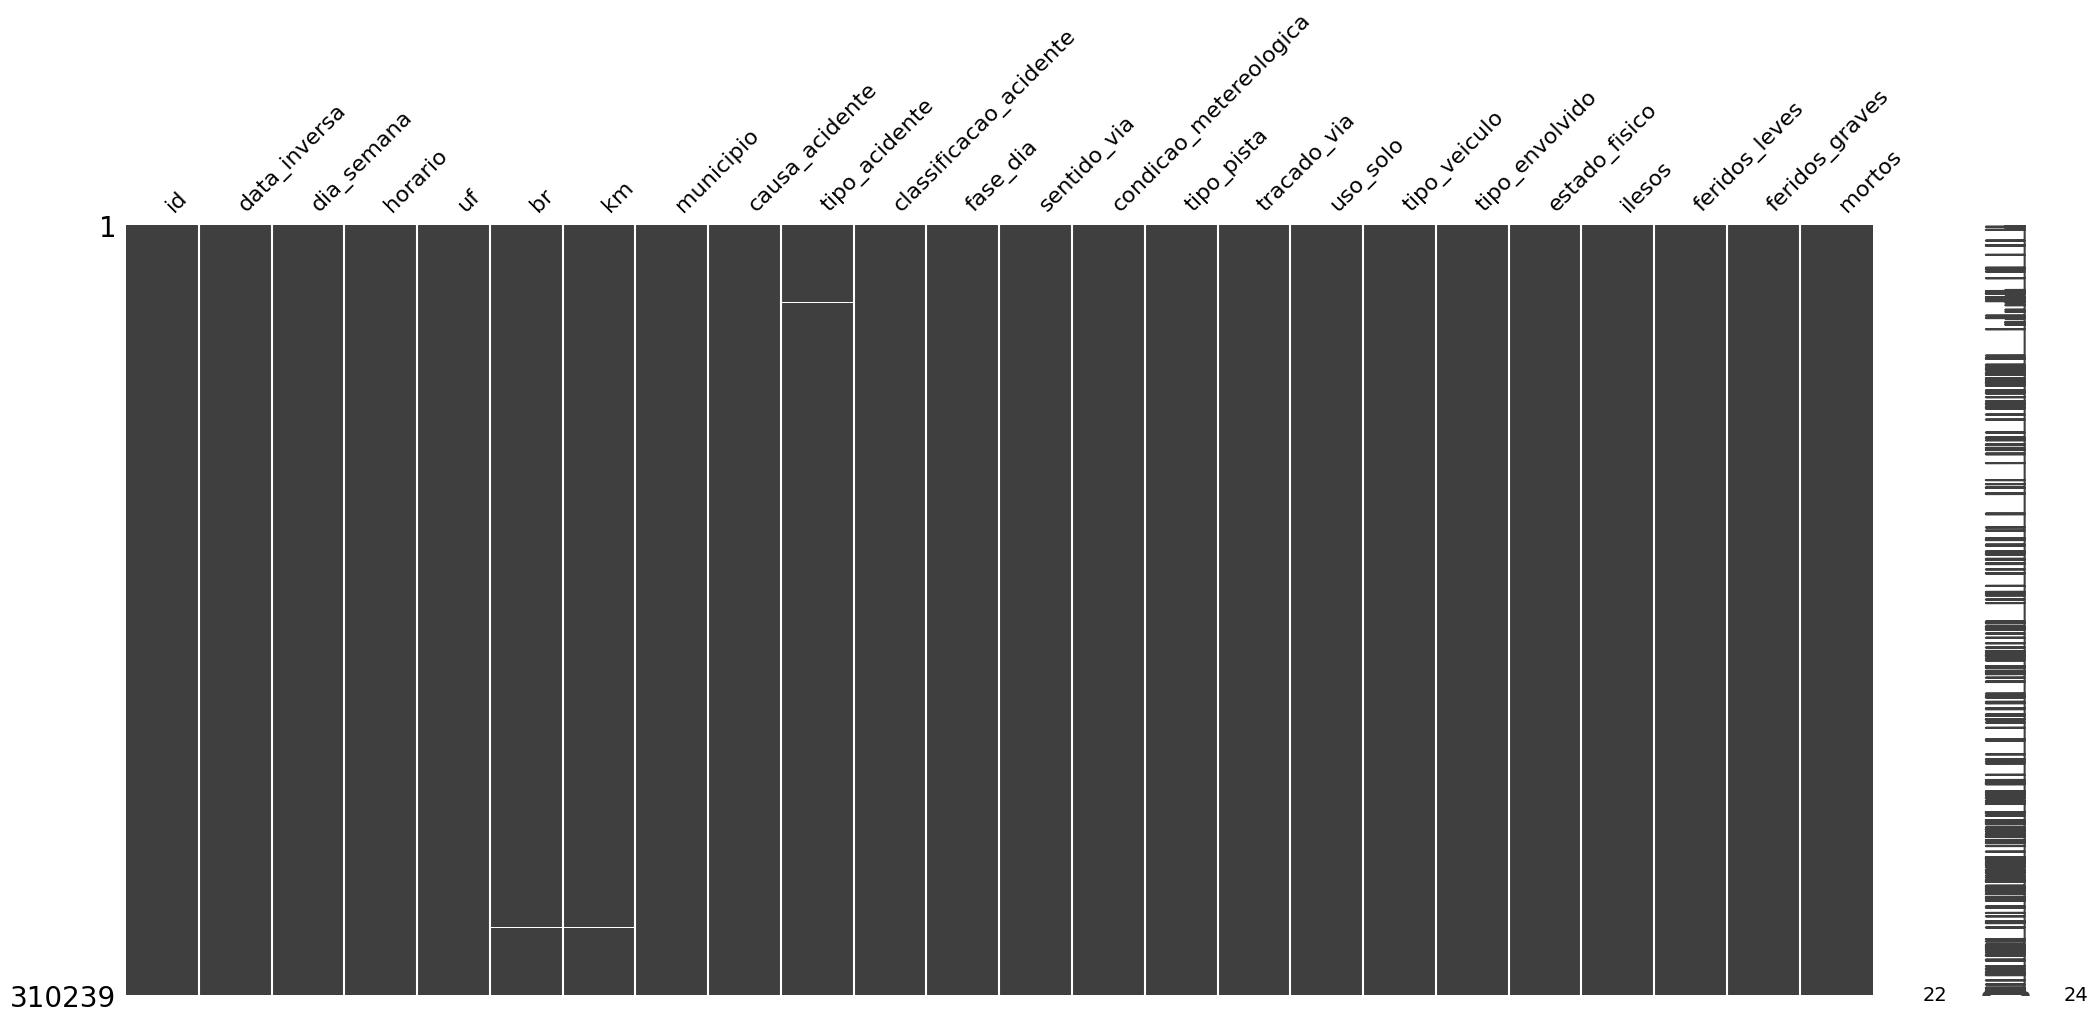

In [17]:
ms.matrix(acidentes)

Mas, mesmo assim, não iremos excluir esses registros, para os atributos KM e BR. Iremos substituir por zero.
>
E o atributo tipo_acidente iremos substituir por 'Não Informado'.

In [18]:
# substituindo os NaN de KM e BR por 0
acidentes['km'].fillna(0, inplace=True)
acidentes['br'].fillna(0, inplace=True)

# substituindo os NaN de tipo_acidente por 'Não Informado'
acidentes['tipo_acidente'].fillna('Não Informado', inplace=True)

In [19]:
# Agora que o atributo BR não tem missings, iremos converter de float para int
acidentes['br'] = acidentes['br'].astype(int)

Pronto, sem missings.

In [20]:
acidentes.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
tipo_veiculo              0
tipo_envolvido            0
estado_fisico             0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
dtype: int64

><font color=#FE8202>KM

Vamos transformar esse atributo para float.
>
Para isso, precismos substituir a virgula por ponto, só assim poderemos converter para float.


In [21]:
#Substituindo virgula por ponto
acidentes.km =  acidentes.km.str.replace(',','.')

#Convertendo para float
acidentes.km =  acidentes.km.astype('float')

In [22]:
acidentes['km'].dtypes

dtype('float64')

---

###**<font color=#FE8202> 4.2 Criação de recursos**

Também conhecida como ***feature engineering***, a criação de recursos consiste em criar, a partir dos atributos originais, um conjunto de atributos que capture informações importantes.

####**<font color=#FE8202> 4.2.2 Construção de recursos**

><font color=#FE8202>Data e tempo

A partir do atributo data_inversa e horario, iremos construir atributos derivados dessa junção, que irá facilitar a visualização dos dados. São eles:
>
ano = ano do acidente
>
mes = mês do acidente
>
hora = extrai "Hora" do horario completo HH:MM:SS
>
ano_mes = ano e mês do acidente
>
semana = valor inteiro que representa o dia da semana

In [23]:
#criando o atributo data_hora, concatenando data_inversa com horario
acidentes['data_hora'] = acidentes['data_inversa'].map(str) + ' ' + acidentes['horario']

#convertendo para datetime
acidentes['data_hora'] = pd.to_datetime(acidentes['data_hora'])

#Extraindo ano, mes, hora, ano_mes e semana
acidentes['ano'] = acidentes['data_hora'].dt.year
acidentes['mes'] = acidentes['data_hora'].dt.month
acidentes['hora'] = acidentes['data_hora'].dt.hour
acidentes['ano_mes'] = acidentes['data_hora'].dt.strftime('%Y-%m')
acidentes['semana'] = acidentes['data_hora'].dt.weekday

In [24]:
#excluir as colunas que não iremos mais utilizar, evitando a redundância de informação
acidentes.drop([ 'horario','dia_semana','data_hora'],	axis=1, inplace = True)



---



###**<font color=#FE8202> 4.3 Redução da dimensionalidade**

Os datasets podem ter muitas características, e muitos algoritmos de Machine Learning funcionam melhor se a dimensionalidade for menor.
>
Iremos utilizar as técnicas a seguir.

####**<font color=#FE8202> 4.3.1 Agregação**


Também pode ser considerada uma técnica de redução de dimensionalidade, pois reduz o número de colunas do dataset.
>
O nosso dataset, detalha o acidente por pessoas envolvidas, ou seja, para um registro de acidente(BO), posso ter mais de uma linha, prepresentando cada pessoa.
>
Vamos criar um dataset agregado com a visão de quantidade de acidentes, agrupandos os atributos que não se repetem.
>
Assim, será possivel fazer analises na visão de acidente.

In [25]:
# Groupby
acidentes_agr = acidentes.groupby(['id','data_inversa','ano','mes','hora','ano_mes','semana','uf','br','km'
                                    ,'municipio','causa_acidente','tipo_acidente','classificacao_acidente','fase_dia','sentido_via'
                                    ,'condicao_metereologica','tipo_pista','tracado_via','uso_solo'
                                    ])['ilesos','feridos_leves','feridos_graves','mortos'].sum().reset_index()

In [26]:
# Quantidade de registros duplicados
# subset - agrupa as colunas chaves
# keep='first' - Se primeiro, considera o primeiro valor como único e o resto como duplicado

acidentes_agr.duplicated(subset=['id'], keep='first').sum()

0

In [27]:
#Cada linha é um registro de ocorrencia
#Criaremos o atributo "acidente", quantidade de acidentes
acidentes_agr['acidente'] = 1

><font color=#FE8202>Atributo Alvo

Como o nosso problema é de aprendizado de máquina supervisionado, pois a partir de resultados conhecidos, posso usar aquilo que já sei para prever cenários que ainda não sei, precisamos de uma variável alvo.
>
O dataframe de acidentes, já tem um atributo chamado classificação_acidente, com os seguintes valores: Sem vítmas, Com vítimas feridas e Com vítimas fatais.
>
Dessa forma podemos criar um atributo binário chamado “risco”, onde classifico os valores “Com vítimas feridas” e “Com vítimas fatais” com 1 e Sem vítimas com 0.



In [28]:
# Criando o atributo risco, aplicando a função lambda em classificacao_acidente
acidentes_agr['risco'] = acidentes_agr.classificacao_acidente.apply(
                    lambda x: 1 if x in ['Com Vítimas Feridas', 'Com Vítimas Fatais'] else 0
                    )

Para melhorar a performance das analises dos algoritmos de Machine Leraning, vamos reduzir o dataset, utilizando a UF com mais acidentes em Rodovias Federais.
>
No próximo passo iremos verificar em qual UF ocorrem mais acidentes.


In [29]:
#criando dataframe para construir grafico
gr_ac_uf =  acidentes_agr.groupby(["uf"])['acidente','ilesos','feridos_leves','feridos_graves','mortos'].sum().reset_index()
#Ordenando
gr_ac_uf = gr_ac_uf.sort_values('acidente', ascending=False)

In [30]:
fig0 = px.bar(gr_ac_uf, x="uf", y="acidente",
             #color='Score',
             template="plotly_dark",
             text_auto=True,
             height=500, #altura
             width=1000,  #largura
             color_discrete_sequence=["#FE8202"],
             hover_data=['ilesos','feridos_leves','feridos_graves','mortos'],
             labels=dict(uf=" UF", acidente = "Acidentes", pessoas='Pessoas', ilesos='Ilesos', feridos_leves='Feridos Leves', feridos_graves='Feridos Graves', mortos='Óbitos'),

             title = "Acidentes de trânsito por UF")
fig0.update_traces(textposition='outside')
fig0.update_yaxes(showticklabels=True)
fig0.update_xaxes(showgrid=False)
fig0.update_yaxes(showgrid=True)
fig0.update_layout(xaxis = dict(linecolor='rgba(0,0,0,1)', # adicionando linha em y = 0
                                tickmode = 'array', # alterando o modo dos ticks
                                tickvals = gr_ac_uf['uf'], # setando a posição do tick de x
                                ticktext = gr_ac_uf['uf']),# setando o valor do tick de x
                                title_x = 0.5) #centralizando o titulo
fig0.show()

A unidade federativa com mais acidentes é Minas Gerais.
>
Agora será criado um dataset apenas com esses registros.

In [31]:
acidentes_agr_uf_mg = acidentes_agr[(acidentes_agr['uf'] == 'MG')].copy()

####**<font color=#FE8202> 4.3.2 Feature Selection**

A seleção de características, ou feature selection, consiste em usar apenas um subconjunto das características originais, desconsiderando as características redundantes ou irrelevantes.
>
Existem diversos métodos, onde um algoritmo pode decidir quais atributos usar e quais ignorar, ou um especialista de negócios toma a decisão de quais atributos selecionar.
>
Nessa etapa vamos utilizar duas técnicas, para verificar a importancia de cada atributo, e assim,selecionar os melhores atributos, para que possa ser utilizado para construir um modelo de **Machine Learnig**.

####**<font color=#FE8202> 4.3.2.1 Preparação dos dados**

Nessa etapa vamos preparar os dados para que possam ser utilizados nas técnicas de seleção de atributos

In [32]:
#Transformar variáveis categóricas em numéricas
# Iniciando o LE
le = LabelEncoder()

#Selecionando o index dos atributos categóricos
colunas = acidentes_agr_uf_mg.dtypes.reset_index()
categ_cols = colunas[colunas[0] == 'object']['index'].to_list()

for i in categ_cols:
    acidentes_agr_uf_mg[str(i) +'_encoded'] = le.fit_transform(acidentes_agr_uf_mg[i])
    acidentes_agr_uf_mg = acidentes_agr_uf_mg.drop(i,axis = 1)


In [33]:
#Criando a variável Alvo(Target)
acidentes_agr_uf_mg['alvo'] = acidentes_agr_uf_mg['risco']
acidentes_agr_uf_mg.drop([ 'risco'],	axis=1, inplace = True)

In [34]:
acidentes_agr_uf_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17097 entries, 4 to 130871
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17097 non-null  float64
 1   ano                             17097 non-null  int64  
 2   mes                             17097 non-null  int64  
 3   hora                            17097 non-null  int64  
 4   semana                          17097 non-null  int64  
 5   br                              17097 non-null  int64  
 6   km                              17097 non-null  float64
 7   ilesos                          17097 non-null  int64  
 8   feridos_leves                   17097 non-null  int64  
 9   feridos_graves                  17097 non-null  int64  
 10  mortos                          17097 non-null  int64  
 11  acidente                        17097 non-null  int64  
 12  data_inversa_encoded           

In [35]:
# Separação em bases de treino e teste
X = acidentes_agr_uf_mg.drop('alvo', axis = 1) #atributos
y = acidentes_agr_uf_mg['alvo'] #classe (alvo)

####**<font color=#FE8202> 4.3.2.2 SelectKBest**

explicar o algoritimo

In [36]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=10)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

In [37]:
# Scores para cada atributo
names = []
values = []
alg = []

# laço para coletar o nome de cada atributo do dataframe e sua devida pontuação
for i in range(len(fit.scores_)):
    alg.append('SelectKBest') #algoritmo utilizado
    names.append(acidentes_agr_uf_mg.columns[i])
    values.append(fit.scores_[i])

fe_select_kbest = pd.DataFrame((zip(alg, names, values)), columns = ['algoritmo','atributo', 'pontuacao'])
fe_select_kbest = (fe_select_kbest.sort_values(by='pontuacao', ascending=False)).head(10)
fe_select_kbest

,algoritmo,atributo,pontuacao
18,SelectKBest,classificacao_acidente_encoded,40568.146009
8,SelectKBest,feridos_leves,1709.294323
9,SelectKBest,feridos_graves,570.467212
7,SelectKBest,ilesos,435.260488
10,SelectKBest,mortos,146.435034
17,SelectKBest,tipo_acidente_encoded,60.589203
16,SelectKBest,causa_acidente_encoded,55.818527
22,SelectKBest,tipo_pista_encoded,41.767172
19,SelectKBest,fase_dia_encoded,22.952222
24,SelectKBest,uso_solo_encoded,10.010970


####**<font color=#FE8202> 4.3.2.3 Eliminação Recursiva**

In [38]:
# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=10)
fit = rfe.fit(X, y)

In [39]:
# Scores para cada atributo
names = []
values = []
alg = []

# laço para coletar o nome de cada atributo do dataframe e sua devida pontuação
for i in range(len(fit.ranking_)):
    alg.append('RFE') #algoritmo utilizado
    names.append(acidentes_agr_uf_mg.columns[i])
    values.append(fit.ranking_[i])

In [40]:
#Criando um dataframe com os selecionadoss
fe_select_RE = pd.DataFrame((zip(alg, names, values)), columns = ['algoritmo','atributo', 'pontuacao'])

#Os selecionados recebem o valor 1
fe_select_RE = fe_select_RE[(fe_select_RE['pontuacao'] == 1)]
fe_select_RE

,algoritmo,atributo,pontuacao
4,RFE,semana,1
7,RFE,ilesos,1
8,RFE,feridos_leves,1
9,RFE,feridos_graves,1
10,RFE,mortos,1
17,RFE,tipo_acidente_encoded,1
18,RFE,classificacao_acidente_encoded,1
19,RFE,fase_dia_encoded,1
22,RFE,tipo_pista_encoded,1
24,RFE,uso_solo_encoded,1


####**<font color=#FE8202> 4.3.2.4 Escolhendo os melhores atributos**

Utilizamos dois algoritmos para verificar a pontuação de cada atributo, agora iremos ver quais campos forão escolhidos e verificar quais foram eleitos nos dois algoritmos.

In [41]:
#Concatenar os dois dataframes com as pontuações e ordenar pelo nome do atributo
fs_pontuacao = pd.concat([fe_select_kbest, fe_select_RE], sort=False, ignore_index=True)

fs_pontuacao.sort_values(by=['atributo','algoritmo'], ascending=False)

,algoritmo,atributo,pontuacao
9,SelectKBest,uso_solo_encoded,10.010970
19,RFE,uso_solo_encoded,1.000000
7,SelectKBest,tipo_pista_encoded,41.767172
18,RFE,tipo_pista_encoded,1.000000
5,SelectKBest,tipo_acidente_encoded,60.589203
15,RFE,tipo_acidente_encoded,1.000000
10,RFE,semana,1.000000
4,SelectKBest,mortos,146.435034
14,RFE,mortos,1.000000
3,SelectKBest,ilesos,435.260488


Podemos verificar que nove atributos foram selecionados pelos dois algoritmos, o que reforça a importância deles.
>
Iremos adicionar os nove atributos, e também os que apareceram de forma individual, totalizando onze atributos no modelo.

**Campos selecionados:**
>
causa_acidente_encoded
>
classificacao_acidente_encoded
>
fase_dia_encoded
>
feridos_graves
>
feridos_leves
>
ilesos
>
mortos
>
semana
>
tipo_acidente_encoded
>
tipo_pista_encoded
>
uso_solo_encoded

####**<font color=#FE8202> 4.3.2.5 Criando o dataset com os melhores atributos**

Nessa etapa iremos criar um dataset somente com os campos selecionados, para ser utilizado na modelagem e inferência.

In [42]:
ml_model_espec = acidentes_agr[['causa_acidente','classificacao_acidente','fase_dia',
                                'semana','tipo_acidente','tipo_pista','uso_solo','risco',
                                'ilesos','feridos_leves','feridos_graves','mortos']]

In [43]:
ml_model_espec.shape

(130874, 12)

###**<font color=#FE8202> 4.4 Transformações categóricas**

Uma etapa muito importante é o tratamento de variáveis categóricas, apesar de não ser uma regra, diversos modelos trabalham com dados numéricos e não são capazes de interpretar dados categóricos.
>
Essas categorias muitas vezes são muito importantes para explicar comportamentos.
>
Sendo assim é preciso representar categorias através de números.
>
Utilizaremos as funções, One-hot encoding, Dummy encoding e LabelEncoder da biblioteca SciKit Learning (Sklearn) para transformar dados categóricos em numéricos.


**Importante!**
>
Antes de começar as tranformações, é necessário separar o dataframe em previsores e alvo.

In [44]:
previsores = ml_model_espec.drop('risco', axis = 1) #previsores
alvo = ml_model_espec['risco'] #alvo

####**<font color=#FE8202> 4.4.1 One-hot Encoding**

In [45]:
# one hot encode para os previsores x
ml_model_onehot = OneHotEncoder(sparse=False).fit_transform(previsores)

In [46]:
#Verificando os dados transformados
print(ml_model_onehot[:5, :])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
ml_model_onehot.shape

(130874, 223)

####**<font color=#FE8202> 4.4.2 Dummy Variable Encoding**

O dummy encoding, também usamos o OneHotEncoder,mas com o parâmetro drop para indicar qual categoria receberá todos os valores zero.

In [48]:
# definindo o transformador como one hot encoding (com Dummy variable encoder)
encoder = OneHotEncoder(drop='first', sparse=False)

# transformando os dados
ml_model_dummy = encoder.fit_transform(previsores)

#Verificando os dados transformados
print(ml_model_dummy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
ml_model_dummy.shape

(130874, 212)

####**<font color=#FE8202> 4.4.3 Label Encoder**

Utilizaremos a função LabelEncoder da biblioteca SciKit Learning (Sklearn) para transformar dados categóricos em numéricos.

In [50]:
#Verificando quais variáveis são categoricas

cols = ml_model_espec.dtypes.reset_index().rename(columns={'index': 'coluna', 0:'tipo'})
categ_cols = cols[cols.tipo == 'object']
cont_cols = cols[cols.tipo != 'object']
print('***** Variáveis Categóricas *****')
print(categ_cols)
print('----------------------------------')
print('***** Variáveis Numéricas *****')
print(cont_cols)

***** Variáveis Categóricas *****
                   coluna    tipo
0          causa_acidente  object
1  classificacao_acidente  object
2                fase_dia  object
4           tipo_acidente  object
5              tipo_pista  object
6                uso_solo  object
----------------------------------
***** Variáveis Numéricas *****
            coluna   tipo
3           semana  int64
7            risco  int64
8           ilesos  int64
9    feridos_leves  int64
10  feridos_graves  int64
11          mortos  int64


---

Vamos criar um laço de repetição FOR para percorrer as colunas do tipo ‘object’, transformando e alterando o nome da coluna incluindo o sufixo “_encoded” e apagando a coluna original.

In [51]:
#Criando o dataset para aplicar o LE
ml_model_le = ml_model_espec.copy()

# Iniciando o LE
le = LabelEncoder()

#Selecionando o index dos atributos categóricos
colunas = ml_model_le.dtypes.reset_index()
categ_cols = colunas[colunas[0] == 'object']['index'].to_list()

for i in categ_cols:
    ml_model_le[str(i) +'_encoded'] = le.fit_transform(ml_model_le[i])
    ml_model_le = ml_model_le.drop(i,axis = 1)

###**<font color=#FE8202> 4.5 Separação em conjunto de Treino e Teste**

Utilizaremos a função train_test_split() do scikit-learn, que irá separar os atributos **previsores** e **alvo**, em quatro partes na proporção de 80/20, ou seja, 80% para dados de treino e 20% para dados de teste.
>
Importante o conjunto de treino ser grande o suficiente para que o modelo seja capaz de aprender os padrões a partir dos dados disponibilizados, enquanto o conjunto de teste, deve ser utilizado apenas uma vez, quando o modelo estiver finalizado, logo, não tem a necessidade de ser muito grande.
>
Michael Galarnyk, ilustra bem no seu artigo, através da imagem abaixo, o procedimento de divisão de teste(test) e treino(train).
(https://builtin.com/data-science/train-test-split)

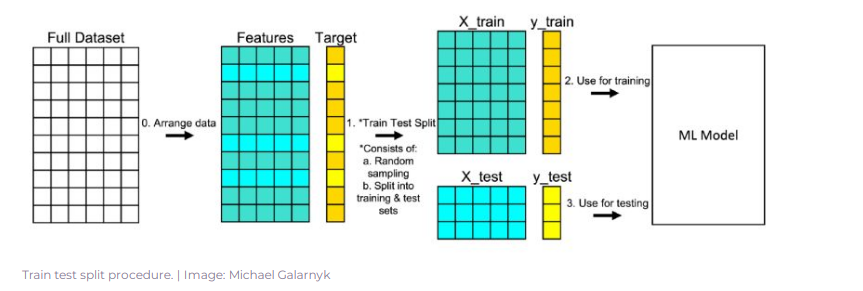

Na etapa de pré-processamento, realizamos a transformação categórica com três técnicas, e agora iremos dividi-los em conjunto de treino e teste, e depois testar qual deles teve o melhor desempenho em um modelo de Machine Learning.

>**<font color=#FE8202> LabelEncoder**

In [52]:
#Separando os dataset em previsores e alvo
previsores_le = ml_model_le.drop('risco', axis = 1) #previsores
alvo_le = ml_model_le['risco'] #alvo

In [53]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

x_treino_le, x_teste_le, y_treino_le, y_teste_le = train_test_split(previsores_le, alvo_le, test_size = test_size, random_state = seed)

# Parâmetros e partições da validação cruzada
scoring = 'f1' #Pontuação f1-score
num_particoes = 15
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [54]:
print('X_treino: {:,d}'.format(x_treino_le.shape[0]).replace(',','.'))
print('Y_treino: {:,d}'.format(y_treino_le.shape[0]).replace(',','.'))
print('X_teste: {:,d}'.format(x_teste_le.shape[0]).replace(',','.'))
print('Y_teste: {:,d}'.format(y_teste_le.shape[0]).replace(',','.'))

X_treino: 104.699
Y_treino: 104.699
X_teste: 26.175
Y_teste: 26.175


---

>**<font color=#FE8202> One-hot Encoder**

In [55]:
#previsor ml_model_onehot e alvo y (Transformados na etapa 4.4.1)
x_treino_oneh, x_teste_oneh, y_treino_oneh, y_teste_oneh = train_test_split(ml_model_onehot, alvo, test_size = test_size, random_state = seed)

---

>**<font color=#FE8202> Dummy Variable Encoding**

In [56]:
#previsor ml_model_onehot e alvo y (Transformados na etapa 4.4.2)
x_treino_dummy, x_teste_dummy, y_treino_dummy, y_teste_dummy = train_test_split(ml_model_dummy, alvo, test_size = test_size, random_state = seed)

---



#**<font color=#FE8202> 5. Modelo de Machine Learning**

###**<font color=#FE8202> 5.1 Criação e avaliação de modelos: linha base**

Para essa avaliação vamos utilizar o **método ensemble**, que combina vários modelos de machine learning, o que pode fazer com que os resultados sejam melhores do que quando usamos apenas um modelo.
>
Vamos utilzar o esembles do tipo voting, que utiliza uma das técnicas mais simples de combinar predições de vários modelos. No nosso caso utilizaremos: Regressão logística, árvore de decisão e SVC.



---



Em seguida, para a base de treino, vamos avaliar a acurácia dos modelos, em suas diferentes transformações categóricas, e treina-los com os algoritimos de: **Regressão Logística, KNN, árvore de classificação, NB e SVM**, utilizando sua configuração padrão, sem variar seus hiperparâmetros.
>
Para uma melhor avaliação, utilizaremos o método de validação cruzada (10 folds) e compararemos os resultados graficamente por meio de boxplots.

><font color=#FE8202>Com LabelEnconder

LR: 1.000000 (0.000000) Tempo de treinamento: 27.29s
KNN: 0.995679 (0.000512) Tempo de treinamento: 17.92s
CART: 1.000000 (0.000000) Tempo de treinamento: 0.60s
NB: 1.000000 (0.000000) Tempo de treinamento: 0.63s
SVM: 0.999988 (0.000030) Tempo de treinamento: 1204.64s
Bagging: 1.000000 (0.000000) Tempo de treinamento: 36.93s
RF: 1.000000 (0.000000) Tempo de treinamento: 32.37s
ET: 1.000000 (0.000000) Tempo de treinamento: 34.98s
Ada: 1.000000 (0.000000) Tempo de treinamento: 0.81s
GB: 1.000000 (0.000000) Tempo de treinamento: 55.19s
Voting: 1.000000 (0.000000) Tempo de treinamento: 1256.60s


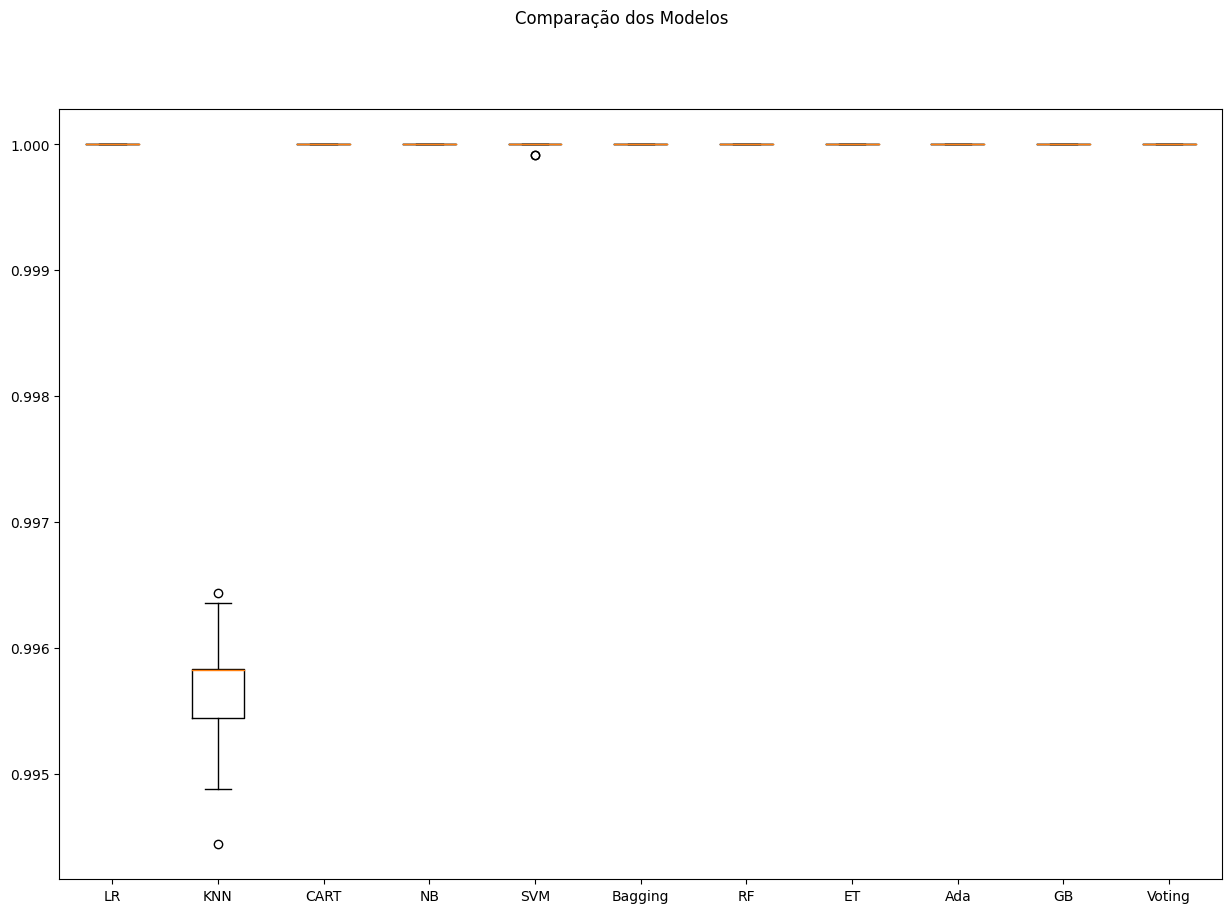

In [114]:
# Tempo de execução 41 minutos
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    inicio = time.time()
    cv_results = cross_val_score(model, x_treino_le, y_treino_le, cv=kfold, scoring=scoring)
    fim = time.time()
    tempo = fim-inicio #tempo de execução do modelo
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada

    print(msg, f"Tempo de treinamento: {tempo:.2f}s") #em segundos

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

><font color=#FE8202>Com One-hot Encoding

LR: 1.000000 (0.000000) Tempo de treinamento: 28.52s
KNN: 0.999930 (0.000091) Tempo de treinamento: 190.35s
CART: 1.000000 (0.000000) Tempo de treinamento: 6.76s
NB: 0.999988 (0.000030) Tempo de treinamento: 6.57s
SVM: 1.000000 (0.000000) Tempo de treinamento: 1082.84s
Bagging: 1.000000 (0.000000) Tempo de treinamento: 376.87s
RF: 1.000000 (0.000000) Tempo de treinamento: 100.93s
ET: 1.000000 (0.000000) Tempo de treinamento: 134.77s
Ada: 1.000000 (0.000000) Tempo de treinamento: 7.76s
GB: 1.000000 (0.000000) Tempo de treinamento: 601.77s
Voting: 1.000000 (0.000000) Tempo de treinamento: 1125.81s


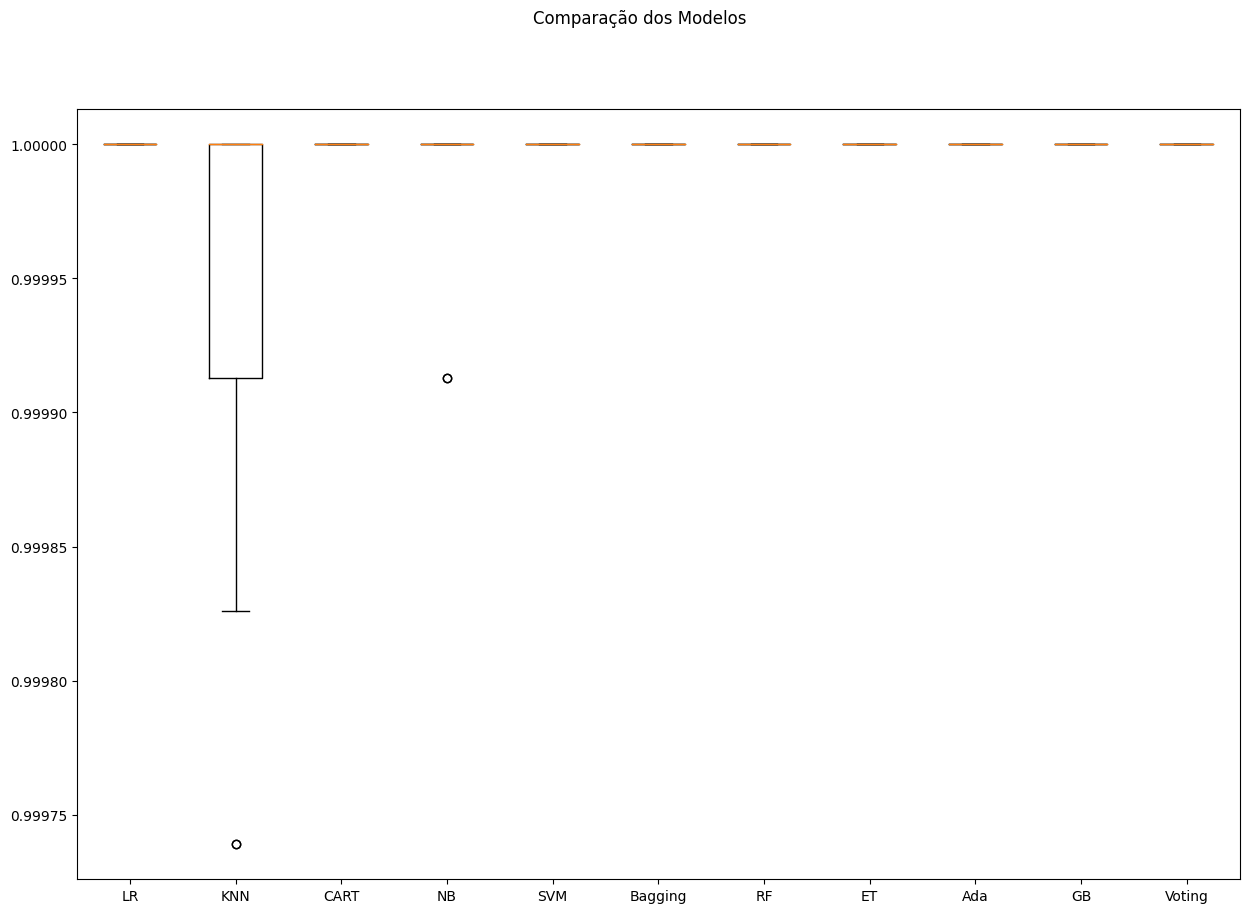

In [78]:
#Tempo de execução 1hr
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    inicio = time.time()
    cv_results = cross_val_score(model, x_treino_oneh, y_treino_oneh, cv=kfold, scoring=scoring)
    fim = time.time()
    tempo = fim-inicio #tempo de execução do modelo
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada

    print(msg, f"Tempo de treinamento: {tempo:.2f}s") #em segundos

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

><font color=#FE8202>Com Dummy Encoding

LR: 1.000000 (0.000000) Tempo de treinamento: 24.30s
KNN: 0.999129 (0.000246) Tempo de treinamento: 182.58s
CART: 1.000000 (0.000000) Tempo de treinamento: 6.40s
NB: 0.999994 (0.000022) Tempo de treinamento: 6.22s
SVM: 1.000000 (0.000000) Tempo de treinamento: 937.02s
Bagging: 1.000000 (0.000000) Tempo de treinamento: 355.87s
RF: 1.000000 (0.000000) Tempo de treinamento: 108.16s
ET: 1.000000 (0.000000) Tempo de treinamento: 147.14s
Ada: 1.000000 (0.000000) Tempo de treinamento: 7.56s
GB: 1.000000 (0.000000) Tempo de treinamento: 573.67s
Voting: 1.000000 (0.000000) Tempo de treinamento: 966.93s


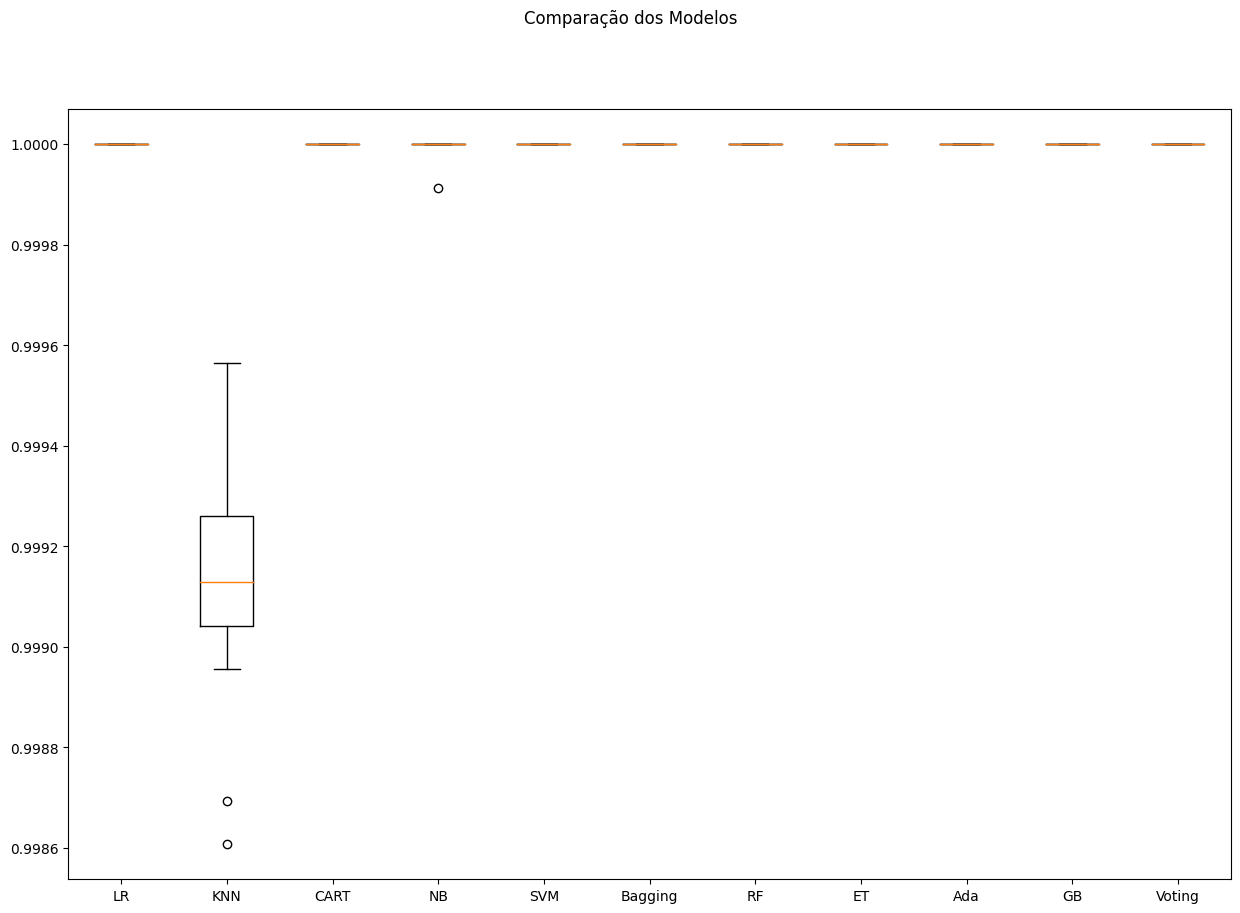

In [79]:
#Tempo de execução 55 min
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    inicio = time.time()
    cv_results = cross_val_score(model, x_treino_dummy, y_treino_dummy, cv=kfold, scoring=scoring)
    fim = time.time()
    tempo = fim-inicio #tempo de execução do modelo
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada

    print(msg, f"Tempo de treinamento: {tempo:.2f}s") #em segundos

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Podemos verificar que o modelo utilizando as transformações categóricas com Label Encoder, são mais rápidas quando comparadas com as demais.
>
Sendo assim, seguiremos as analises utilizando Label Encoder.

###**<font color=#FE8202> 5.2 Criação e avaliação de modelos: dados padronizados e normalizados**

Nessa etapa vamos utilizar a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original

LR-orig: 1.000000 (0.000000) Tempo de treinamento: 25.29s
KNN-orig: 0.995679 (0.000512) Tempo de treinamento: 18.18s
CART-orig: 1.000000 (0.000000) Tempo de treinamento: 0.59s
NB-orig: 1.000000 (0.000000) Tempo de treinamento: 0.62s
SVM-orig: 0.999988 (0.000030) Tempo de treinamento: 1290.13s
Bag-orig: 1.000000 (0.000000) Tempo de treinamento: 38.60s
RF-orig: 1.000000 (0.000000) Tempo de treinamento: 32.06s
ET-orig: 1.000000 (0.000000) Tempo de treinamento: 36.20s
Ada-orig: 1.000000 (0.000000) Tempo de treinamento: 0.94s
GB-orig: 1.000000 (0.000000) Tempo de treinamento: 54.43s
Vot-orig: 1.000000 (0.000000) Tempo de treinamento: 1281.41s
LR-padr: 1.000000 (0.000000) Tempo de treinamento: 4.69s
KNN-padr: 0.999936 (0.000067) Tempo de treinamento: 26.04s
CART-padr: 1.000000 (0.000000) Tempo de treinamento: 0.77s
NB-padr: 1.000000 (0.000000) Tempo de treinamento: 0.73s
SVM-padr: 0.999948 (0.000062) Tempo de treinamento: 70.11s
Bag-padr: 1.000000 (0.000000) Tempo de treinamento: 37.77s
RF-p

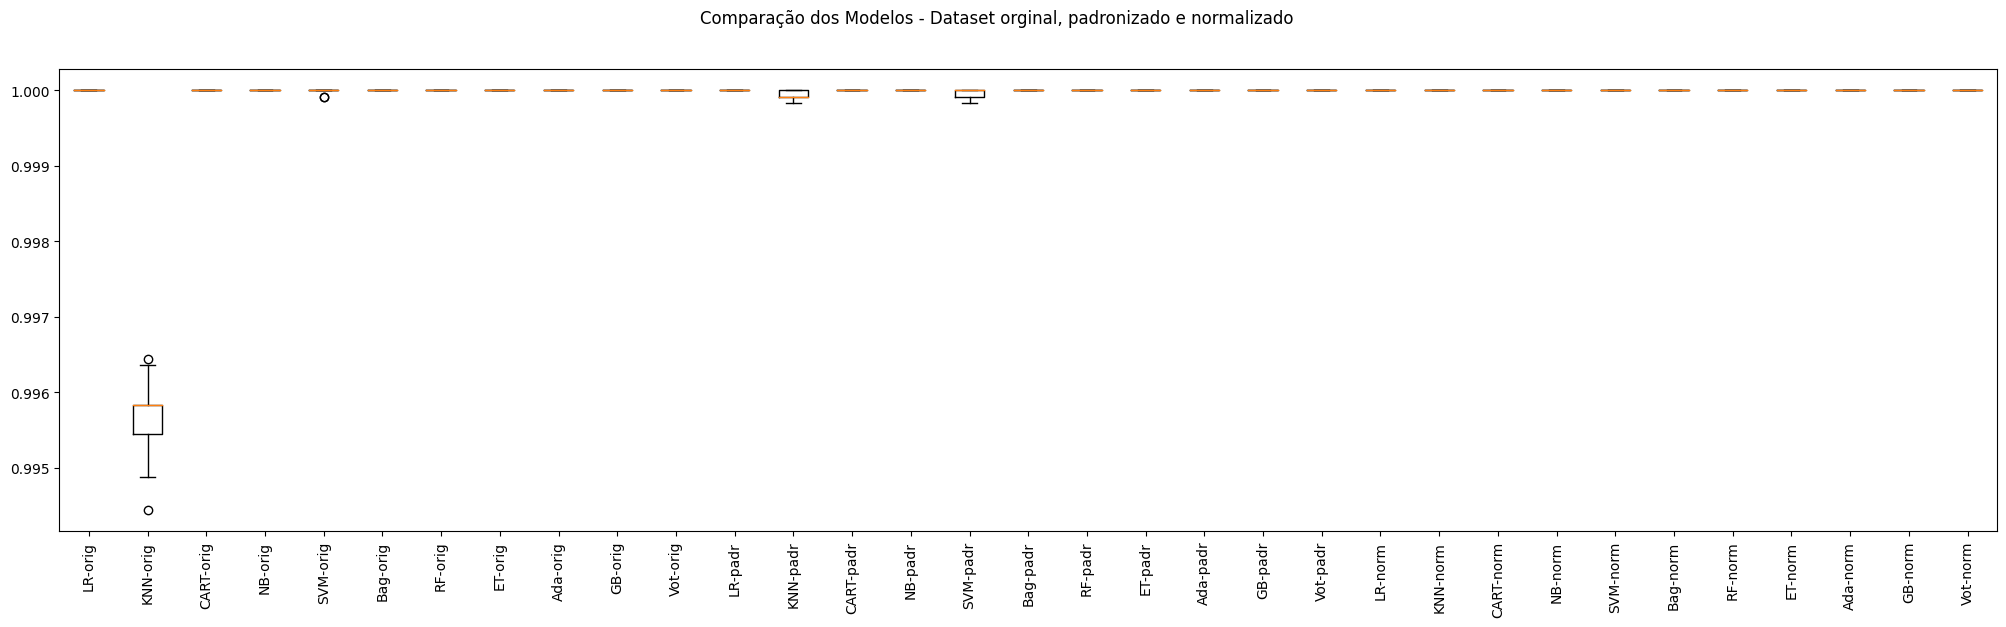

In [115]:
#Tempo de execução 55 minutos
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    inicio = time.time()
    cv_results = cross_val_score(model, x_treino_le, y_treino_le, cv=kfold, scoring=scoring)
    fim = time.time()
    tempo = fim-inicio #tempo de execução do modelo
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg, f"Tempo de treinamento: {tempo:.2f}s")   #em segundos



# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

###**<font color=#FE8202> 5.3 Otimização dos hiperparâmetros**

Agora iremos utilizar a biblioteca Grid Search para executar a otimização dos hiperparâmetros dos algoritmos **Árvore de decisão**, **Regressão Logística** e **KNN**, a título de exemplificação, a fim de buscar resultados ainda melhores.

####**<font color=#FE8202> 5.3.1 Árvore de decisão**

Árvore de decisão é um método de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão.
>
Seleciona a ordem que os atributos irão aparecer na árvore, sempre de cima para baixo, conforme sua importância para a predição, assim como determina a separação dos ramos da árvore.
>
Estrutura similar a um fluxograma. É composto por nós, ramos e folhas.


In [58]:
arvore = DecisionTreeClassifier()

#Definindo os parâmetros
param_grid = {"criterion": ["gini", "entropy"], #criterio
              "min_samples_split": range(1,11), # o mínimo de registros necessários para que uma separação seja feita
              "max_depth": 	   range(1,11), #Profundidade máxima da árvore
              "min_samples_leaf": range(1,6), # o mínimo de registros necessários em cada nós-folha
              "max_leaf_nodes": [1, 2, 5, 10, 15, 20] # a quantidade máxima de nós-folha que a árvore pode ter
}

#Executando o GridSearchCV
grid = GridSearchCV(arvore, param_grid, cv=6, scoring='accuracy')
grid_result = grid.fit(x_treino_le, y_treino_le)


In [59]:
#Avaliando os resultados
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

1.0
{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)


Agora que já temos os melhores parâmetros, vamos aplica-los.

In [60]:
# Preparação do modelo
inicio = time.time()
arvore = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
arvore.fit(x_treino_le, y_treino_le)
fim = time.time()
log_arvore = fim-inicio

In [61]:
# Estimativa da acurácia no conjunto de teste
previsoes_arvore = arvore.predict(x_teste_le)

# Avaliação

#Acurácia
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_le, previsoes_arvore) * 100.0))
# Precisão
print("Precisão: %.2f%%" % (precision_score(y_teste_le, previsoes_arvore) * 100.0))
# Recall / Revocação
print("Revocação: %.2f%%" % (recall_score(y_teste_le, previsoes_arvore) * 100.0))
# F1 score
print("F1-Score: %.2f%%" % (f1_score(y_teste_le, previsoes_arvore) * 100.0))
print(f"Tempo de treinamento: {log_arvore:.2f}s")

Acurácia: 100.00%
Precisão: 100.00%
Revocação: 100.00%
F1-Score: 100.00%
Tempo de treinamento: 0.04s


> <font color=#FE8202>Matriz de confusão

Após estimar a classe nos dados de teste, comparamos a classe estimada pelo modelo com a classe real.
>
Como o classificador tem apenas 2 opções de classificação, a matriz de confusão tem dimensões 2 por 2, onde as posições representam:
>
(0,0). Verdadeiro positvo (TP)
>
(0,1): Falsos negativos (FN)
>
(1,0): Falsos positivos (FP)
>
(1,1) Verdadeiros negativos (TN)


Text(50.722222222222214, 0.5, 'previsoes_arvore')

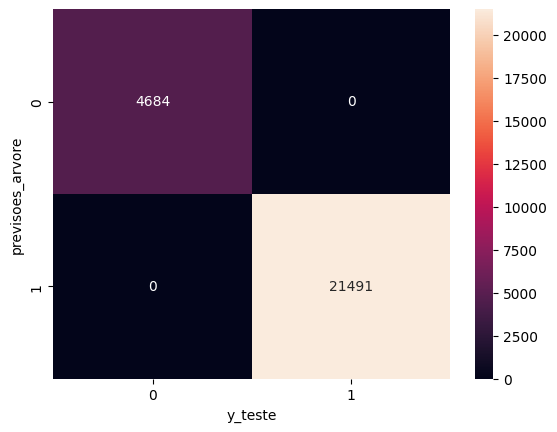

In [62]:
sns.heatmap(confusion_matrix(y_teste_le, previsoes_arvore), annot= True, fmt='g')
plt.xlabel('y_teste')
plt.ylabel('previsoes_arvore')

In [63]:
print('Total de Amostras: {:,d}'.format(y_teste_le.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_le == previsoes_arvore).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_le != previsoes_arvore).sum()).replace(',','.'))

Total de Amostras: 26.175
Acertos de classificação: 26.175
Erros de classificação: 0


####**<font color=#FE8202> 5.3.2 Regressão Logística**

Algoritmo de classificação em aprendizagem supervisionada.
Utiliza conceitos de regressão linear em seu modelo matemático.
>
Pode ser binária (variável dependente binária) ou multinomial
(variável dependente com mais de duas categorias).

In [122]:
log_re = LogisticRegression(max_iter=200)

#Definindo os parâmetros
param_grid = {'C': np.logspace(-5, 8, 15), 'penalty': ['l1', 'l2']}

#Executando o GridSearchCV
grid = GridSearchCV(log_re, param_grid, cv=6, scoring='accuracy')
grid_result = grid.fit(x_treino_le, y_treino_le)

In [123]:
#Avaliando os resultados
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

1.0
{'C': 0.4393970560760795, 'penalty': 'l2'}
LogisticRegression(C=0.4393970560760795, max_iter=200)


Agora que já temos os melhores parâmetros, vamos aplica-los.

In [73]:
# Preparação do modelo
inicio = time.time()
log_re = LogisticRegression(C=0.4393970560760795, max_iter=200)
log_re.fit(x_treino_le, y_treino_le)
fim = time.time()
log_log_re = fim-inicio

In [74]:
# Estimativa da acurácia no conjunto de teste
previsoes_log_re = log_re.predict(x_teste_le)

# Avaliação

#Acurácia
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_le, previsoes_log_re) * 100.0))
# Precisão
print("Precisão: %.2f%%" % (precision_score(y_teste_le, previsoes_log_re) * 100.0))
# Recall / Revocação
print("Revocação: %.2f%%" % (recall_score(y_teste_le, previsoes_log_re) * 100.0))
# F1 score
print("F1-Score: %.2f%%" % (f1_score(y_teste_le, previsoes_log_re) * 100.0))
print(f"Tempo de treinamento: {log_log_re:.2f}s")

Acurácia: 100.00%
Precisão: 100.00%
Revocação: 100.00%
F1-Score: 100.00%
Tempo de treinamento: 1.88s


> <font color=#FE8202>Matriz de confusão

Text(50.722222222222214, 0.5, 'previsoes_regressão_logistica')

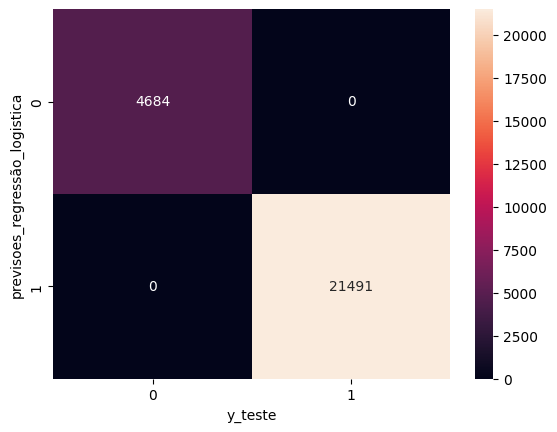

In [75]:
sns.heatmap(confusion_matrix(y_teste_le, previsoes_log_re), annot= True, fmt='g')
plt.xlabel('y_teste')
plt.ylabel('previsoes_regressão_logistica')

In [76]:
print('Total de Amostras: {:,d}'.format(y_teste_le.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_le == previsoes_log_re).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_le != previsoes_log_re).sum()).replace(',','.'))

Total de Amostras: 26.175
Acertos de classificação: 26.175
Erros de classificação: 0


####**<font color=#FE8202> 5.3.3 Aprendizagem baseada em instâncias (KNN)**

KNN é a sigla de K Nearest Neighbors (vizinhos mais próximos), realizando a classificação das instâncias (dados) em classes (grupo de dados semelhantes).
>
É um algoritmo de classificação em aprendizagem supervisionada, e não possuiu um modelo matemático, apenas classifica uma instância através de cálculos de distâncias.


In [65]:
knn = KNeighborsClassifier()

#Definindo os parâmetros
knn_range = list(range(1, 31))
param_grid = dict(n_neighbors=knn_range)


#Executando o GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=6, scoring='accuracy')
grid_result = grid.fit(x_treino_le, y_treino_le)

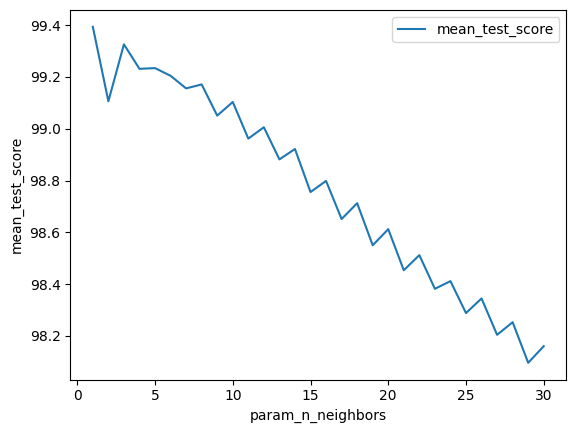

In [66]:
# Plotando um grafico com os resultados de cada parâmetro
result = pd.DataFrame(grid.cv_results_)[['param_n_neighbors','mean_test_score']]
result['mean_test_score'] = result['mean_test_score']*100
result.plot(kind='line',x='param_n_neighbors',y='mean_test_score')
plt.xlabel('param_n_neighbors')
plt.ylabel('mean_test_score')
plt.show()

Podemos reparar que o melhor resultado é com n_neighbors = 1.
>
Depois do parâmetro 3, o score diminui constantimente.

In [67]:
#Avaliando os resultados
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9939349890358602
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


Agora que já temos os melhores parâmetros, vamos aplica-los.

In [68]:
# Preparação do modelo
inicio = time.time()
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_treino_le, y_treino_le)
fim = time.time()
log_knn = fim-inicio

In [70]:
# Estimativa da acurácia no conjunto de teste
previsoes_knn = knn.predict(x_teste_le)

# Avaliação

#Acurácia
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_le, previsoes_knn) * 100.0))
# Precisão
print("Precisão: %.2f%%" % (precision_score(y_teste_le, previsoes_knn) * 100.0))
# Recall / Revocação
print("Revocação: %.2f%%" % (recall_score(y_teste_le, previsoes_knn) * 100.0))
# F1 score
print("F1-Score: %.2f%%" % (f1_score(y_teste_le, previsoes_knn) * 100.0))
print(f"Tempo de treinamento: {log_knn:.2f}s")

Acurácia: 99.45%
Precisão: 99.63%
Revocação: 99.70%
F1-Score: 99.66%
Tempo de treinamento: 0.25s


> <font color=#FE8202>Matriz de confusão

Text(50.722222222222214, 0.5, 'previsoes_knn')

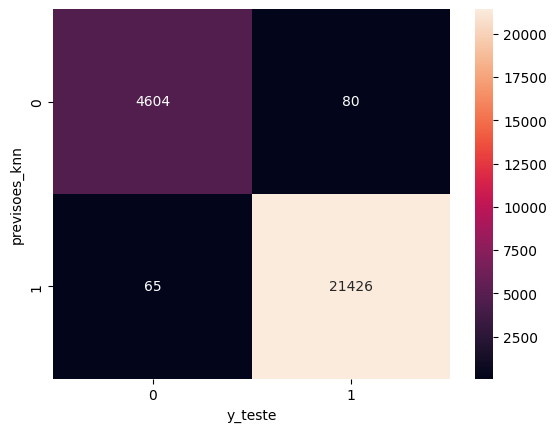

In [71]:
sns.heatmap(confusion_matrix(y_teste_le, previsoes_knn), annot= True, fmt='g')
plt.xlabel('y_teste')
plt.ylabel('previsoes_knn')

In [72]:
print('Total de Amostras: {:,d}'.format(y_teste_le.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_le == previsoes_knn).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_le != previsoes_knn).sum()).replace(',','.'))

Total de Amostras: 26.175
Acertos de classificação: 26.030
Erros de classificação: 145




---



###**<font color=#FE8202> 5.4 Melhor Modelo**

Vamos compara as avaliações dos três modelos anteriores.

In [77]:
print('Árvore de decisão')
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_le, previsoes_arvore) * 100.0))
print("Precisão: %.2f%%" % (precision_score(y_teste_le, previsoes_arvore) * 100.0))
print("Revocação: %.2f%%" % (recall_score(y_teste_le, previsoes_arvore) * 100.0))
print("F1-Score: %.2f%%" % (f1_score(y_teste_le, previsoes_arvore) * 100.0))
print(f"Tempo de treinamento: {log_arvore:.2f}s")
print('Total de Amostras: {:,d}'.format(y_teste_le.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_le == previsoes_arvore).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_le != previsoes_arvore).sum()).replace(',','.'))
print('--------------------------------------------------------------------------------------')
print('Regressão Logística')
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_le, previsoes_log_re) * 100.0))
print("Precisão: %.2f%%" % (precision_score(y_teste_le, previsoes_log_re) * 100.0))
print("Revocação: %.2f%%" % (recall_score(y_teste_le, previsoes_log_re) * 100.0))
print("F1-Score: %.2f%%" % (f1_score(y_teste_le, previsoes_log_re) * 100.0))
print(f"Tempo de treinamento: {log_log_re:.2f}s")
print('Total de Amostras: {:,d}'.format(y_teste_le.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_le == previsoes_log_re).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_le != previsoes_log_re).sum()).replace(',','.'))
print('--------------------------------------------------------------------------------------')
print('KNN')
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_le, previsoes_knn) * 100.0))
print("Precisão: %.2f%%" % (precision_score(y_teste_le, previsoes_knn) * 100.0))
print("Revocação: %.2f%%" % (recall_score(y_teste_le, previsoes_knn) * 100.0))
print("F1-Score: %.2f%%" % (f1_score(y_teste_le, previsoes_knn) * 100.0))
print(f"Tempo de treinamento: {log_log_re:.2f}s")
print('Total de Amostras: {:,d}'.format(y_teste_le.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_le == previsoes_knn).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_le != previsoes_knn).sum()).replace(',','.'))

Árvore de decisão
Acurácia: 100.00%
Precisão: 100.00%
Revocação: 100.00%
F1-Score: 100.00%
Tempo de treinamento: 0.04s
Total de Amostras: 26.175
Acertos de classificação: 26.175
Erros de classificação: 0
--------------------------------------------------------------------------------------
Regressão Logística
Acurácia: 100.00%
Precisão: 100.00%
Revocação: 100.00%
F1-Score: 100.00%
Tempo de treinamento: 1.88s
Total de Amostras: 26.175
Acertos de classificação: 26.175
Erros de classificação: 0
--------------------------------------------------------------------------------------
KNN
Acurácia: 99.45%
Precisão: 99.63%
Revocação: 99.70%
F1-Score: 99.66%
Tempo de treinamento: 1.88s
Total de Amostras: 26.175
Acertos de classificação: 26.030
Erros de classificação: 145


Com os três algorítmos configurados com os melhores parâmetros, o que mais se destacou foi a Árvore de decisão, acertando todas as classificações, e com o menor tempo de execução.
>
No próximo passo vamos uitiza-lo para verificar dados não testados.

###**<font color=#FE8202> 5.5 Simulando a aplicação do modelo em dados não vistos**

Iremos simular a aplicação do modelo em dados não vistos, simulando um arquivo enviado pelo usuário com novas instâncias, mas que não sabemos a classe de saída.
>
Poderemos, então,aplicar nosso modelo recém-treinado para fazer a predição das classes.
>
Será necessário carregar esse arquivo com as mesmas transformações de dados utilizadas no treinamento do modelo.


In [94]:
# importando dados de uma url para um dataframe

# URL de importação
url3  = "https://raw.githubusercontent.com/gabrielmprata/MVP_SP02_Macine_Learning_Deep/main/dados_novos.csv"

# Carga do dataset para o Pandas dataframe
acidentes_novos = pd.read_csv(url3, encoding="Latin 1", sep=';')


In [95]:
#Verificando a carga
acidentes_novos.head(3)

,semana,ilesos,feridos_leves,feridos_graves,mortos,causa_acidente,classificacao_acidente,fase_dia,tipo_acidente,tipo_pista,uso_solo
0,4,2,1,0,0,Ingestão de álcool pelo condutor,Com Vítimas Feridas,Plena Noite,Colisão traseira,Dupla,Não
1,4,0,2,0,0,Velocidade Incompatível,Com Vítimas Feridas,Plena Noite,Colisão com objeto,Dupla,Não
2,4,1,0,0,0,Demais falhas mecânicas ou elétricas,Sem Vítimas,Plena Noite,Incêndio,Dupla,Sim


In [96]:
#Criando o dataset para aplicar o LE
ml_model_new = acidentes_novos.copy()

# Iniciando o LE
le = LabelEncoder()

#Selecionando o index dos atributos categóricos
colunas = ml_model_new.dtypes.reset_index()
categ_cols = colunas[colunas[0] == 'object']['index'].to_list()

for i in categ_cols:
     ml_model_new[str(i) +'_encoded'] = le.fit_transform(ml_model_new[i])
     ml_model_new = ml_model_new.drop(i,axis = 1)


In [97]:
ml_model_new

,semana,ilesos,feridos_leves,feridos_graves,mortos,causa_acidente_encoded,classificacao_acidente_encoded,fase_dia_encoded,tipo_acidente_encoded,tipo_pista_encoded,uso_solo_encoded
0,4,2,1,0,0,15,1,1,7,0,0
1,4,0,2,0,0,24,1,1,3,0,0
2,4,1,0,0,0,9,2,1,8,0,1
3,4,1,2,0,0,17,1,1,5,1,1
4,4,1,0,1,0,21,1,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,4,4,0,0,0,24,2,2,10,0,0
96,4,1,1,0,0,2,1,2,9,0,0
97,4,2,1,0,0,24,1,2,10,0,1
98,4,1,4,0,0,24,1,2,10,0,0


In [98]:
novos = arvore.predict(ml_model_new)

In [100]:
print(novos)

[1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [102]:
type(ml_model_new)

pandas.core.frame.DataFrame